In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

# Reading Data

In [3]:
data_df = pd.read_csv('drug_dataset.csv')
data_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Visualizing Data

In [4]:
# Generating colors for each unique value in the data
def get_color_map(data):
    items = np.unique(data)
    item_colors = {}
    colors_item = {}
    for item in items:
        new_color = np.random.randint(0, items.__len__() + 1)
        while new_color in colors_item:
            new_color = np.random.randint(0, items.__len__() + 1)
        item_colors[item] = new_color
        colors_item[new_color] = item

    data_item_colors = []
    for i in data:
        data_item_colors.append(item_colors[i])
    return data_item_colors, colors_item

# Returns the label for the color
def get_color_label(color_dict, label):
    return color_dict[int(label[label.index('{') + 1: label.index('}')])]

In [5]:
data_drug_colors, colors_drug = get_color_map(data_df.Drug)

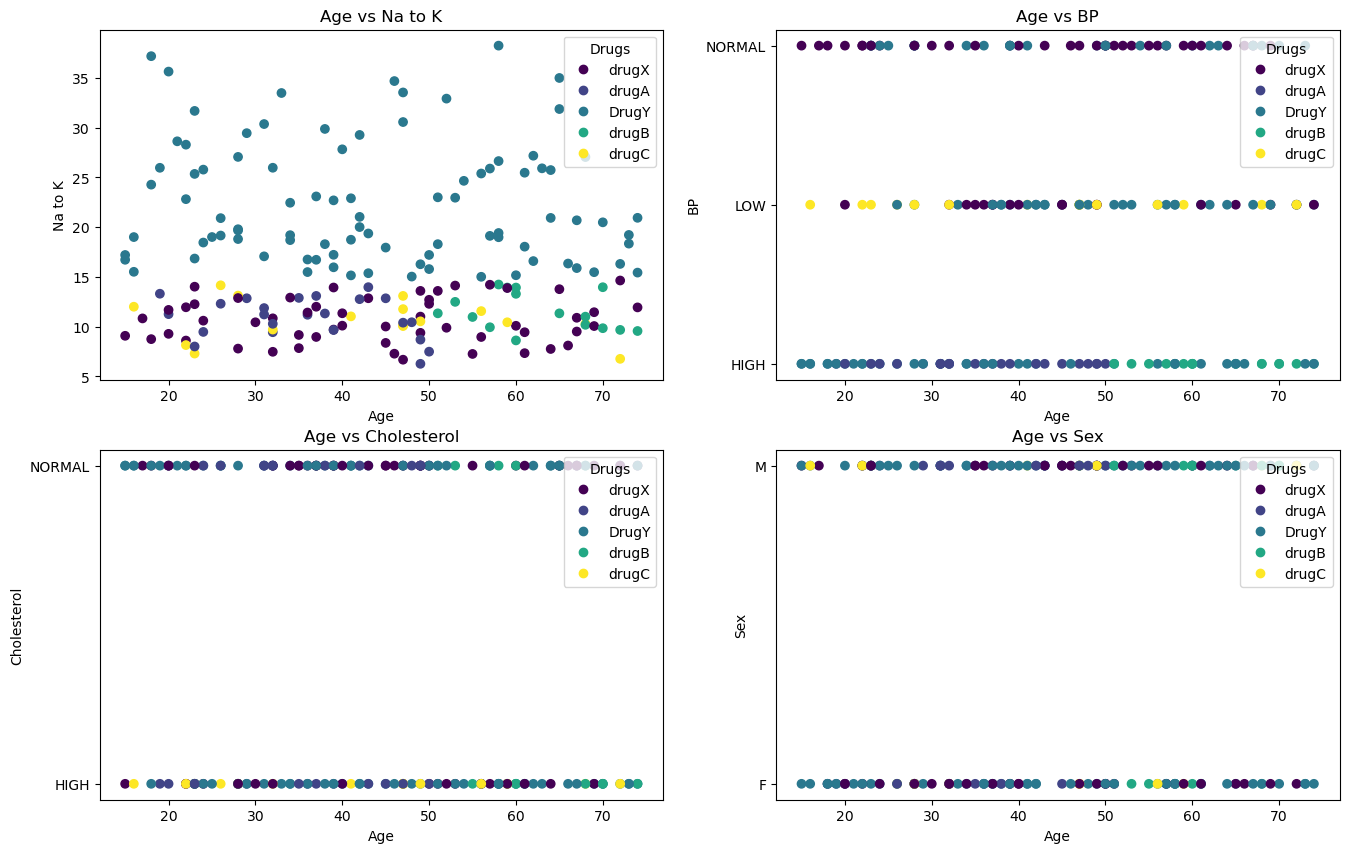

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Displaying Different Drugs given to people of different age and Na to K values
scatter = axs[0, 0].scatter(data_df.Age, data_df.Na_to_K, c = data_drug_colors)
axs[0, 0].title.set_text('Age vs Na to K')
plt.setp(axs[0, 0], xlabel='Age', ylabel= 'Na to K')
colors, labels = scatter.legend_elements()
axs[0, 0].legend(colors, [get_color_label(colors_drug, d) for d in labels], loc = 'upper right', title = 'Drugs')

# Age and BP Vs Drug Type
scatter = axs[0, 1].scatter(data_df.Age, data_df.BP, c = data_drug_colors)
axs[0, 1].title.set_text('Age vs BP')
plt.setp(axs[0, 1], xlabel='Age', ylabel= 'BP')
colors, labels = scatter.legend_elements()
axs[0, 1].legend(colors, [get_color_label(colors_drug, d) for d in labels], loc = 'upper right', title = 'Drugs')

# Age and Cholesterol Vs Drug Type
scatter = axs[1, 0].scatter(data_df.Age, data_df.Cholesterol, c = data_drug_colors)
axs[1, 0].title.set_text('Age vs Cholesterol')
plt.setp(axs[1, 0], xlabel='Age', ylabel= 'Cholesterol')
colors, labels = scatter.legend_elements()
axs[1, 0].legend(colors, [get_color_label(colors_drug, d) for d in labels], loc = 'upper right', title = 'Drugs')

# Age and Sex Vs Drug Type
scatter = axs[1, 1].scatter(data_df.Age, data_df.Sex, c = data_drug_colors)
axs[1, 1].title.set_text('Age vs Sex')
plt.setp(axs[1, 1], xlabel='Age', ylabel= 'Sex')
colors, labels = scatter.legend_elements()
axs[1, 1].legend(colors, [get_color_label(colors_drug, d) for d in labels], loc = 'upper right', title = 'Drugs')

# Preprocessing and Normalizing Data

In [7]:
# Converts categorical value to numerical values
def categorical_to_numerical(df, column_name):
    unique_values = np.unique(df[column_name])
    unique_nums = list(range(0, unique_values.__len__()))
    df[column_name] = df[column_name].replace(unique_values, unique_nums)

In [8]:
# Normalizes the features
def normalize(df, column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    df[column] = (df[column] - mean) / std
    return (mean, std)

In [10]:
data_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [25]:
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
labels = ['Drug']

# Splitting data
X_df = data_df[features]
y_df = pd.DataFrame(data_df[labels])

# Converting categorical values to numbers
categorical_to_numerical(X_df, 'Sex')
categorical_to_numerical(X_df, 'BP')
categorical_to_numerical(X_df, 'Cholesterol')
categorical_to_numerical(y_df, 'Drug')

C:\Users\asimw\AppData\Local\Temp\ipykernel_740\1601981081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(unique_values, unique_nums)


In [26]:
# Normalizing only Age and Na to K and leaving categorical features as it is
normalized_dict = {}
normalized_dict['Age'] = normalize(X_df, 'Age')
normalized_dict['Na_to_K'] = normalize(X_df, 'Na_to_K')

C:\Users\asimw\AppData\Local\Temp\ipykernel_740\428396645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - mean) / std


# Training Model

In [69]:
# Predicts value based on weights and features
def predict(theta, X):
    return 1 / (1 + np.exp(-np.dot(X, theta)))

# Returns cost of the outputs
def cost(theta, X, y, lam):
    m = y.shape[0]
    return (1 / m) * np.sum(-np.multiply(y, np.log(predict(theta, X))) - np.multiply((1 - y), np.log(1 - predict(theta, X)))) + (lam / (2 * m)) * np.sum(np.square(theta))

# Returns the updated values of the parameter theta
def gradient(theta, X, y, alpha, lam):
    m = y.shape[0]
    n = X.shape[1]
    regularized_grads = theta - (alpha / m) * np.transpose(np.dot(np.transpose((predict(theta, X) - y)), X)) + (lam / m)
    grads = theta - (alpha / m) * np.transpose(np.dot(np.transpose((predict(theta, X) - y)), X))
    regularized_grads[0] = grads[0]
    return regularized_grads

# Returns the accuracy in percentage
def accuracy(y_pred, y):
    return (np.sum(y_pred == y) / len(y)) * 100

In [78]:
theta = np.random.rand(2, 1)
x = np.array([[1, 2], [1, 3], [1, 4]])
y_t = np.array([1, 2, 3])
cost(theta, x, y_t, 2)

-8.121687827700026

Splitting Data in training and testing sets

In [70]:
m, n = X_df.shape
split_percentage = 0.95
total_training_samples = int(m * split_percentage)
training_samples = np.random.choice(m, total_training_samples)
testing_samples = np.delete(list(range(0, m)), training_samples)

# Defining training and testing sets
X = np.array(X_df)

# Concatenating 1 to the begining of each row
ones = np.ones((m, 1))
X = np.concatenate((ones, X), axis=1)

y = np.array(y_df)
X_train = X[training_samples]
y_train = y[training_samples]
X_test = X[testing_samples]
y_test = y[testing_samples]

In [71]:
# Shapes of Training and Testing sets
print('Training Set')
print(X_train.shape, y_train.shape)
print('Testing Set')
print(X_test.shape, y_test.shape)

Training Set
(190, 6) (190, 1)
Testing Set
(73, 6) (73, 1)


## Defining Required Variables

In [72]:
theta = np.random.rand(n + 1, 1)
lam = 2
learning_rate = 0.01
epochs = 500
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

In [73]:
for epoch in tqdm(range(1, epochs)):
    # Finding the training loss
    training_loss = cost(theta, X_train, y_train, lam)
    # Finding the validation loss
    validation_loss = cost(theta, X_test, y_test, lam)
    # Finding the training accuracy
    training_pred = predict(theta, X_train)
    training_accuracy = accuracy(training_pred, y_train)
    # Finding the validation accuracy
    validation_pred = predict(theta, X_test)
    validation_accuracy = accuracy(validation_pred, y_test)
    # Updating the theta
    theta = gradient(theta, X, y, learning_rate, lam)
    # Displaying information
    print(f'Epoch: {epoch}, Training Loss: {round(training_loss, 2)}, Training Acc: {round(training_accuracy, 2)}, Validation Loss: {round(validation_loss, 2)}, Validation Acc: {round(validation_accuracy, 2)}')
    # Storing the data in the history
    history['loss'].append(training_loss)
    history['accuracy'].append(training_accuracy)
    history['val_loss'].append(validation_loss)
    history['val_accuracy'].append(validation_accuracy)

  0%|          | 0/499 [00:00<?, ?it/s]C:\Users\asimw\AppData\Local\Temp\ipykernel_740\4058442548.py:8: RuntimeWarning: divide by zero encountered in log
  return (1 / m) * np.sum(-np.multiply(y, np.log(predict(theta, X))) - np.multiply((1 - y), np.log(1 - predict(theta, X)))) + (lam / (2 * m)) * np.sum(np.square(theta))
d:\Applications\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
100%|██████████| 499/499 [00:00<00:00, 4434.75it/s]

Epoch: 1, Training Loss: -1.1, Training Acc: 0.0, Validation Loss: -1.06, Validation Acc: 0.0
Epoch: 2, Training Loss: -1.14, Training Acc: 0.0, Validation Loss: -1.11, Validation Acc: 0.0
Epoch: 3, Training Loss: -1.19, Training Acc: 0.0, Validation Loss: -1.16, Validation Acc: 0.0
Epoch: 4, Training Loss: -1.24, Training Acc: 0.0, Validation Loss: -1.2, Validation Acc: 0.0
Epoch: 5, Training Loss: -1.28, Training Acc: 0.0, Validation Loss: -1.25, Validation Acc: 0.0
Epoch: 6, Training Loss: -1.33, Training Acc: 0.0, Validation Loss: -1.3, Validation Acc: 0.0
Epoch: 7, Training Loss: -1.37, Training Acc: 0.0, Validation Loss: -1.34, Validation Acc: 0.0
Epoch: 8, Training Loss: -1.42, Training Acc: 0.0, Validation Loss: -1.39, Validation Acc: 0.0
Epoch: 9, Training Loss: -1.46, Training Acc: 0.0, Validation Loss: -1.44, Validation Acc: 0.0
Epoch: 10, Training Loss: -1.51, Training Acc: 0.0, Validation Loss: -1.48, Validation Acc: 0.0
Epoch: 11, Training Loss: -1.55, Training Acc: 0.0, 

In [75]:
data_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
